# *Optimum Clusters Prediction uisng Unsupervised Learning*

The goal of this project is to find optimum number of clusters using unsupervised learning technique. To train a model that divides data into clusters, I will use KMeans Clustering Algorithm for training and prediction while, the Elbow Method will be used to visualize the optimum value for clusters that minimizes the error.

## Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Dataset

In [3]:
data = pd.read_csv('./Data/Iris.csv').drop(columns=['Id'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


This dataset contains 3 classes of 150 examples each and each class alludes to a sort of iris plant. The dataset has four highlights: sepal length, sepal width, petal length, and petal width. The fifth segment is for species, which holds the incentive for types of plants. For instance, one of the kinds is a setosa.

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data values are not broadly separated because the mean is closed to the minimum and maximum value of same feature, Also, standard deviations do not contain higher values. Therefore, we do not need to use normalization or other scaling techniques to delimit values within a certain range.

In [6]:
# check for any misiing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the data.

## Exploratory Data Analysis

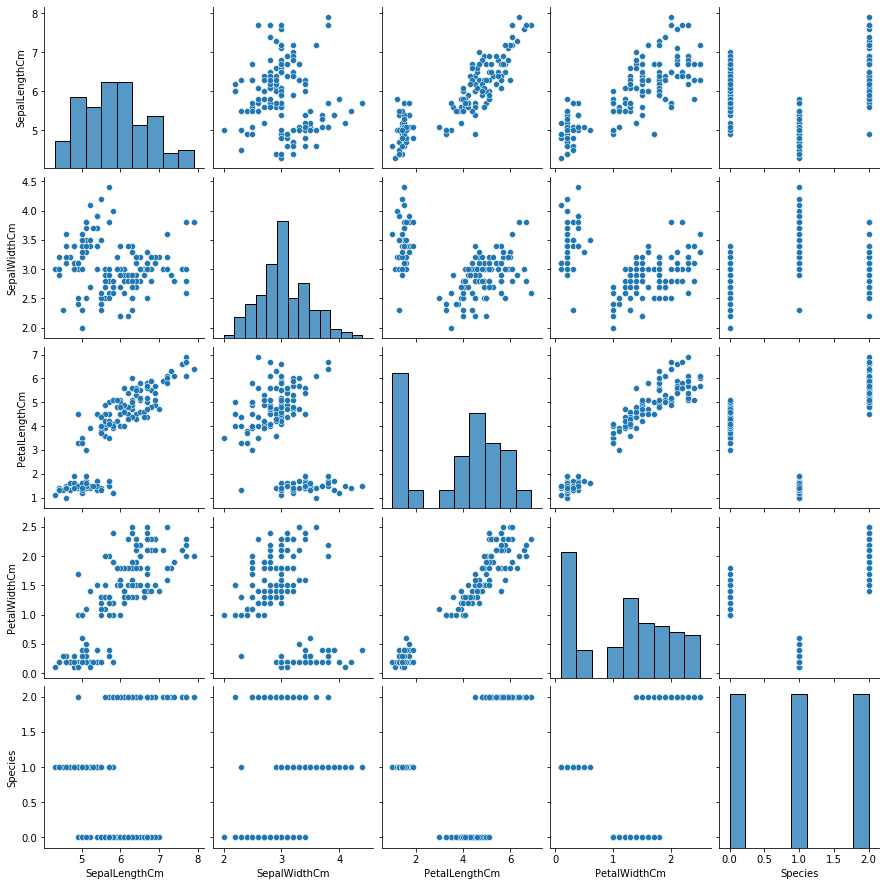

In [162]:
sns.pairplot(data)

## Model building

In [9]:
# Prepare data for training
X = data.iloc[:, [0,1,2,3]].values

I will train the KMans algorithm with different value of n_clusters so that the errors(inertia) of each model can be measured. To do this, I will iterate through 9 different values of clusters, KMeans in each iteration will be trained to a new cluster value. To see result I will plot the clustered data to see how well the model has segmented the data.

Inertia  is the sum of the square distances of sample to the nearest cluster center. If the value of 'K' is too high, then the number of points inside the cluster will be less and therefore the inertia will be less. 

C:\Users\abids\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


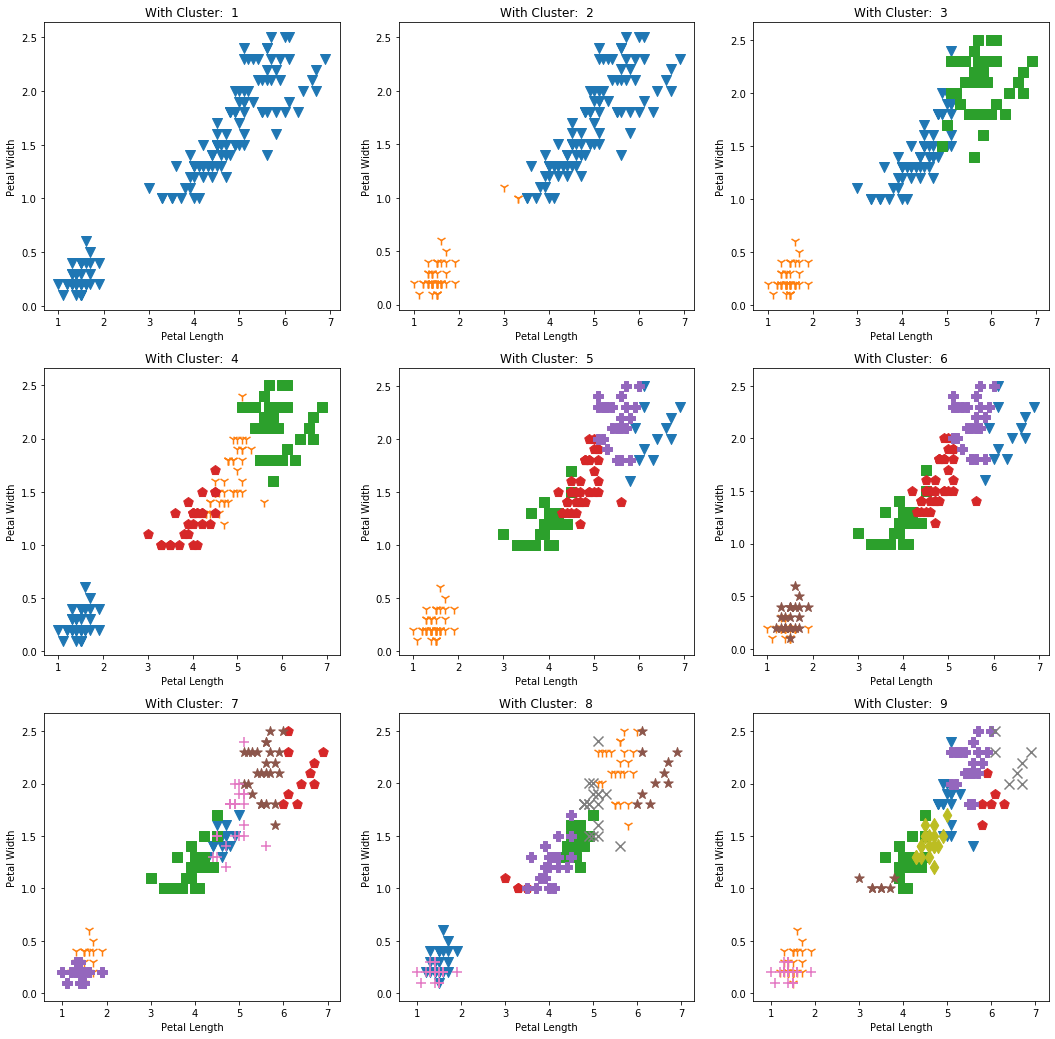

In [164]:
# find ptimal number of clusters for KMeans Clustering
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
ax = np.ravel(ax)

inertia = [] 

# iterating for multiple number of clusters from 1-9 
for i in range(1,10): 
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    pred = cluster_model.fit_predict(X)
    
    # Sum of squared distances of samples to their closest cluster center
    inertia.append(cluster_model.inertia_) 
    
    # Visualize clusters
    mark = ["v", "1", "s", "p", "P", "*", "+", "x", "d"] # markers for each cluster representation
    for j in range(9):
        ax[i-1].scatter(X[pred == j,2], X[pred == j,3], s=100, marker = mark[j])

    ax[i-1].set_title("With Cluster: %2d" %(i))
    ax[i-1].set_xlabel("Petal Length")
    ax[i-1].set_ylabel("Petal Width")

The pair represents different number of cluster segmentation performed by the clustering algorithm.
When the value of cluster exceeds 3, data points begin to overlap. While for cluster value 1, all
data points grouped into one cluster which is not the purpose of the project.

Therefore, a good number for clusters is between 2 and 4, using the "Elbow Method" will confirm the analysis.

## Elbow Method

Elbow method is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k and visualize it by plotting a graph between the number of clusters and the corresponding error value.

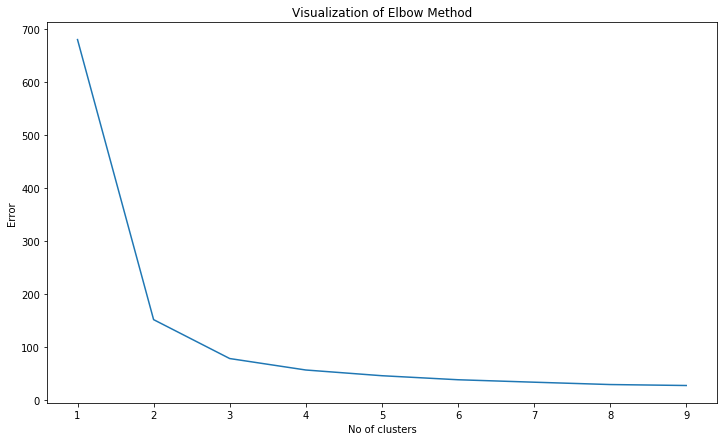

In [12]:
# Plot results onto 'Line Graph', to observe 'Elbow Method'
plt.figure(figsize=(12,7))

plt.plot(range(1, 10), inertia)
plt.title('Visualization of Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The optimum clusters is the place where the elbow occurs. This is the point at which the within cluster sum of squares doesn't decrease altogether with each iteration.
The elbow is formed approximately at K = 3. Therefore, the optimum number of clusters is 3.

We can get an absolute segmentation when we put higher K values but if the points with in each cluster are very less then the variation on the real data will be high leading it into over-simplifying the data.

So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation.

## Implent KMans with K=3

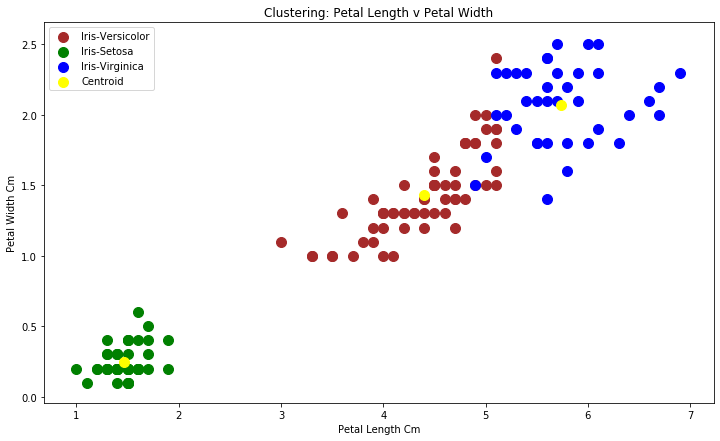

In [185]:
# Implement KMeans again using k=3 (no of clusters)
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(X)
pred = Kmeans.predict(X)

# Observe the segmentation of clusters
plt.figure(figsize=(12,7))

# Visualize clusters
plt.scatter(X[pred == 0,2], X[pred == 0,3] , c='brown', label='Iris-Versicolor', s=100)
plt.scatter(X[pred == 1,2], X[pred == 1,3] , c='green', label='Iris-Setosa', s=100)
plt.scatter(X[pred == 2,2], X[pred == 2,3] , c='blue', label='Iris-Virginica', s=100)

# Plot centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 2], Kmeans.cluster_centers_[:, 3], label = 'Centroid', c='yellow', s=100)

plt.title("Clustering: Petal Length v Petal Width")
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.legend()